In [ ]:
import pandas as pd  # Operación con Dataframes
import numpy as np  # Cálculos numéricos
import re  # Operación con expresiones regulares
#import library nltk
import nltk
#import stopwords
from nltk.corpus import stopwords
#nltk import PorterStemmer
from nltk.stem import PorterStemmer
import textblob
import plotly.express as px

In [ ]:
# Cargar Dataset (corpus) depurado
df_depurado = pd.read_csv('new_csv.csv')

# mostrar los primeros registros
df_depurado.head()

,text,feeling
0,"['one', 'reviewers', 'mentioned', 'watching', ...",positive
1,"['wonderful', 'little', 'production', 'filming...",positive
2,"['thought', 'wonderful', 'way', 'spend', 'time...",positive
3,"['basically', 'family', 'little', 'boy', 'jake...",negative
4,"['petter', 'mattei', 'love', 'time', 'money', ...",positive


In [ ]:
# importar Librería TextBlob
import textblob

# Crearemos, por seguridad, una copia del dataset depurado para esta implementación
textblob_data=df_depurado.copy()

# mostrar primeros registros
textblob_data.head()

,text,feeling
0,"['one', 'reviewers', 'mentioned', 'watching', ...",positive
1,"['wonderful', 'little', 'production', 'filming...",positive
2,"['thought', 'wonderful', 'way', 'spend', 'time...",positive
3,"['basically', 'family', 'little', 'boy', 'jake...",negative
4,"['petter', 'mattei', 'love', 'time', 'money', ...",positive


In [ ]:
# Inicializar listas vacías para almacenar los resultados
subjetividad = []
sentimiento_score = []
sentimiento = []

In [ ]:
# Función para analizar el sentimiento de las reseñas con TextBlob

def analizar_sentimiento(df):
    """
    Esta función analiza el sentimiento de las reseñas en el dataframe df utilizando la librería TextBlob.
    Para cada reseña, se calcula la polaridad (puntaje de sentimiento) y la subjetividad.
    En base al puntaje de polaridad, se asigna una etiqueta de sentimiento como "Positivo" o "Negativo".
    Los resultados se almacenan en listas separadas para su posterior uso.
    """



    # Recorrer cada reseña en la columna "texto" del dataframe
    for reseña_texto in df['text'].values:
        # Crear un objeto TextBlob a partir de la reseña
        reseña = textblob.TextBlob(reseña_texto)

        # Obtener el puntaje de polaridad (sentimiento) y subjetividad
        puntaje_polaridad = reseña.sentiment[0]
        puntaje_subjetividad = reseña.sentiment[1]

        # Asignar etiqueta de sentimiento en base al puntaje de polaridad
        if puntaje_polaridad <= 0:
            etiqueta_sentimiento = "Negativo"
        else:
            etiqueta_sentimiento = "Positivo"

        # Almacenar los resultados en las listas correspondientes
        subjetividad.append(puntaje_subjetividad)
        sentimiento_score.append(puntaje_polaridad)
        sentimiento.append(etiqueta_sentimiento)

# **Ejecución de la función para analizar el sentimiento de las reseñas**

analizar_sentimiento(textblob_data)


In [ ]:
sentimiento_score

[0.04194581280788177,
 0.12598039215686274,
 0.2853174603174603,
 0.001388888888888884,
 0.2345508658008658,
 0.045454545454545456,
 0.2587121212121212,
 0.11856060606060606,
 -0.2176262626262626,
 0.4124999999999999,
 0.13095238095238096,
 0.09327731092436974,
 0.09111498257839722,
 0.15918367346938772,
 0.18000000000000002,
 0.00900000000000001,
 0.05169413919413923,
 -0.21739130434782605,
 0.12,
 0.17205882352941182,
 0.022849462365591402,
 -0.17683333333333334,
 0.39999999999999997,
 -0.010454545454545444,
 0.06979166666666667,
 0.10386904761904762,
 0.2007232350982351,
 -0.014444444444444423,
 -0.10972222222222221,
 -0.017989417989417982,
 0.010640830800405272,
 0.08592342342342342,
 0.13030303030303034,
 0.11520966595593463,
 0.028494623655913983,
 -0.008551587301587298,
 -0.38958333333333334,
 0.06142213642213642,
 0.34910714285714284,
 -0.18903743315508023,
 0.15333333333333332,
 0.3079861111111112,
 -0.12366522366522364,
 0.0924,
 0.11805555555555554,
 0.1530844155844156,
 0.4

In [ ]:
print(sentimiento_score)
# Agregar columnas al dataset con los resultados del análisis de sentimiento
def agregar_columnas_sentimiento(df, sentimiento_score, subjetividad, sentimiento):


    # Agregar las nuevas columnas al dataframe
    df['Puntaje de polaridad'] = sentimiento_score
    df['Subjetividad'] = subjetividad
    df['Etiqueta de sentimiento'] = sentimiento

# **Ejecución de la función para agregar las columnas de sentimiento**

agregar_columnas_sentimiento(textblob_data, sentimiento_score, subjetividad, sentimiento)

#*Mostrar el dataset con las nuevas columnas

textblob_data.head()

[0.04194581280788177, 0.12598039215686274, 0.2853174603174603, 0.001388888888888884, 0.2345508658008658, 0.045454545454545456, 0.2587121212121212, 0.11856060606060606, -0.2176262626262626, 0.4124999999999999, 0.13095238095238096, 0.09327731092436974, 0.09111498257839722, 0.15918367346938772, 0.18000000000000002, 0.00900000000000001, 0.05169413919413923, -0.21739130434782605, 0.12, 0.17205882352941182, 0.022849462365591402, -0.17683333333333334, 0.39999999999999997, -0.010454545454545444, 0.06979166666666667, 0.10386904761904762, 0.2007232350982351, -0.014444444444444423, -0.10972222222222221, -0.017989417989417982, 0.010640830800405272, 0.08592342342342342, 0.13030303030303034, 0.11520966595593463, 0.028494623655913983, -0.008551587301587298, -0.38958333333333334, 0.06142213642213642, 0.34910714285714284, -0.18903743315508023, 0.15333333333333332, 0.3079861111111112, -0.12366522366522364, 0.0924, 0.11805555555555554, 0.1530844155844156, 0.48333333333333334, 0.20000000000000004, 0.13076

,text,feeling,Puntaje de polaridad,Subjetividad,Etiqueta de sentimiento
0,"['one', 'reviewers', 'mentioned', 'watching', ...",positive,0.041946,0.498325,Positivo
1,"['wonderful', 'little', 'production', 'filming...",positive,0.125980,0.546078,Positivo
2,"['thought', 'wonderful', 'way', 'spend', 'time...",positive,0.285317,0.676984,Positivo
3,"['basically', 'family', 'little', 'boy', 'jake...",negative,0.001389,0.459259,Positivo
4,"['petter', 'mattei', 'love', 'time', 'money', ...",positive,0.234551,0.409686,Positivo


In [ ]:
# Exploremos uno de los comentarios y sus valores con TextBlob
print('EL comentario es:',textblob_data['text'][2])
textblob_data.iloc[2,0:]

EL comentario es: ['thought', 'wonderful', 'way', 'spend', 'time', 'hot', 'summer', 'weekend', 'sitting', 'air', 'conditioned', 'theater', 'watching', 'light', 'hearted', 'comedy', 'plot', 'simplistic', 'dialogue', 'witty', 'characters', 'likable', 'even', 'well', 'bread', 'suspected', 'serial', 'killer', 'may', 'disappointed', 'realize', 'match', 'point', '2', 'risk', 'addiction', 'thought', 'proof', 'woody', 'allen', 'still', 'fully', 'control', 'style', 'many', 'us', 'grown', 'love', 'laughed', 'one', 'woody', 'comedies', 'years', 'dare', 'say', 'decade', 'never', 'impressed', 'scarlet', 'johanson', 'managed', 'tone', 'sexy', 'image', 'jumped', 'right', 'average', 'spirited', 'young', 'woman', 'may', 'crown', 'jewel', 'career', 'wittier', 'devil', 'wears', 'prada', 'interesting', 'superman', 'great', 'comedy', 'go', 'see', 'friends']


text                       ['thought', 'wonderful', 'way', 'spend', 'time...
feeling                                                             positive
Puntaje de polaridad                                                0.285317
Subjetividad                                                        0.676984
Etiqueta de sentimiento                                             Positivo
Name: 2, dtype: object

In [ ]:
# **Función para graficar la distribución de la polaridad por sentimiento**

def graficar_distribucion_polaridad_por_sentimiento(df,label):

    # Graficar el histograma con Plotly Express
    fig = px.histogram(
        data_frame=df,
        x=label,
        color="Etiqueta de sentimiento",
        title="Distribución de la polaridad por sentimiento",
        labels={"Puntaje de polaridad": "Puntaje", "Etiqueta de sentimiento": "sentimiento"},
    )

    # Mostrar el gráfico
    fig.show()

# **Ejecución de la función para graficar la distribución**

graficar_distribucion_polaridad_por_sentimiento(textblob_data,'Puntaje de polaridad')


In [ ]:
# Visualizar número de registros etiquetados como negativos y positivos en el dataset
textblob_data['feeling'].value_counts()

feeling
positive    25000
negative    25000
Name: count, dtype: int64

In [ ]:
# Visualizar número de registros etiquetados como negativos y positivos mediante TextBlob
textblob_data['Etiqueta de sentimiento'].value_counts()

Etiqueta de sentimiento
Positivo    36660
Negativo    13340
Name: count, dtype: int64

In [ ]:
graficar_distribucion_polaridad_por_sentimiento(textblob_data,'Etiqueta de sentimiento')


In [ ]:
# Codificaremos numericamente las etiquetas para comparar los resultados
textblob_data['feeling'].replace({'positive':1,'negative':0},inplace = True)
textblob_data['Etiqueta de sentimiento'].replace({'Positivo':1,'Negativo':0},inplace = True)

# mostrar dataset luego de la codificación
textblob_data.head()

,text,feeling,Puntaje de polaridad,Subjetividad,Etiqueta de sentimiento
0,"['one', 'reviewers', 'mentioned', 'watching', ...",1,0.041946,0.498325,1
1,"['wonderful', 'little', 'production', 'filming...",1,0.125980,0.546078,1
2,"['thought', 'wonderful', 'way', 'spend', 'time...",1,0.285317,0.676984,1
3,"['basically', 'family', 'little', 'boy', 'jake...",0,0.001389,0.459259,1
4,"['petter', 'mattei', 'love', 'time', 'money', ...",1,0.234551,0.409686,1


In [ ]:
# Evaluación de la clasificación con TextBlob
from sklearn.metrics import accuracy_score

accuracy_score(textblob_data['feeling'], textblob_data['Etiqueta de sentimiento'])*100


70.236

Matriz de confusión:
[[11729  1611]
 [13271 23389]]


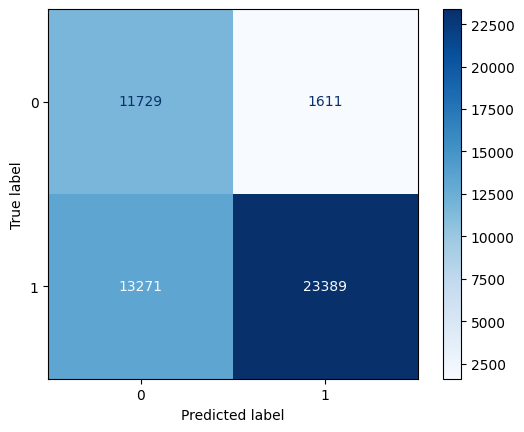

In [ ]:
# **Función para crear y mostrar la matriz de confusión**

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

def mostrar_matriz_confusion(df_con_predicciones, columna_predicciones, columna_verdadera):
  # Obtener las predicciones y las etiquetas verdaderas del dataframe
  y_true = df_con_predicciones[columna_verdadera]
  y_pred = df_con_predicciones[columna_predicciones]

  # Calcular la matriz de confusión utilizando sklearn.metrics.confusion_matrix
  cm = confusion_matrix(y_true, y_pred)

  # Imprimir la matriz de confusión
  print("Matriz de confusión:")
  print(cm)

  # Generar la visualización de la matriz de confusión utilizando ConfusionMatrixDisplay
  ConfusionMatrixDisplay(cm).plot(cmap="Blues")  # Puedes personalizar el mapa de colores

# **Ejecución de la función para mostrar la matriz de confusión**
mostrar_matriz_confusion(textblob_data, 'feeling', 'Etiqueta de sentimiento')


In [ ]:
# Reporte de Clasificación
from sklearn.metrics import classification_report
print(classification_report(textblob_data['feeling'], textblob_data['Etiqueta de sentimiento']))


              precision    recall  f1-score   support

           0       0.88      0.47      0.61     25000
           1       0.64      0.94      0.76     25000

    accuracy                           0.70     50000
   macro avg       0.76      0.70      0.69     50000
weighted avg       0.76      0.70      0.69     50000



Naive Bayes
Para a análisis de sentimientos



In [ ]:
# Crearemos una copia del dataset depurado para su trabajo en este apartado
nv_data=df_depurado.copy()

# mostrar dataframe
nv_data.head()

,text,feeling
0,"['one', 'reviewers', 'mentioned', 'watching', ...",positive
1,"['wonderful', 'little', 'production', 'filming...",positive
2,"['thought', 'wonderful', 'way', 'spend', 'time...",positive
3,"['basically', 'family', 'little', 'boy', 'jake...",negative
4,"['petter', 'mattei', 'love', 'time', 'money', ...",positive


In [ ]:
import pandas as pd

# **Función para seleccionar y mostrar datos**

def seleccionar_y_mostrar_datos(df, columna_texto):
    """
    Esta función selecciona los valores de una columna específica (en este caso, 'texto')
    de un dataframe y muestra información sobre la dimensión de los datos seleccionados.
    """

    # Seleccionar solo los valores de la columna 'texto'
    texto = df[columna_texto].values

    # Mostrar información sobre la dimensión de los datos seleccionados
    print(f"Se seleccionaron {len(texto)} registros de la columna '{columna_texto}'.")
    print(f"Dimensión de los datos seleccionados: {texto.shape}")

# Ejecución de la función para seleccionar y mostrar datos text

seleccionar_y_mostrar_datos(nv_data, 'text')


Se seleccionaron 50000 registros de la columna 'text'.
Dimensión de los datos seleccionados: (50000,)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# **Función para vectorizar el texto con CountVectorizer**

def vectorizar_texto_con_cv(df, columna_texto, max_features=2000):
    """
    Esta función vectoriza el texto de una columna específica (en este caso, 'texto')
    utilizando CountVectorizer de scikit-learn.

    """

    # Obtener el texto de la columna especificada
    texto = df[columna_texto].values

    # Crear una instancia de CountVectorizer
    cv = CountVectorizer(max_features=max_features)

    # Ajustar el vectorizador al texto y transformarlo en una matriz de recuentos de tokens
    X = cv.fit_transform(texto).toarray()

    # Retornar la matriz de recuentos de tokens
    return X

# **Ejecución de la función para vectorizar el texto**

X = vectorizar_texto_con_cv(nv_data, 'text')

# Imprimir las primeras 5 filas de la matriz de recuentos de tokens
print(X[:5])


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 2 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
# definir eje y para dividir el set para entrenamiento y prueba
y = nv_data.iloc[:,-1].values
y[:10]

array(['positive', 'positive', 'positive', 'negative', 'positive',
       'positive', 'positive', 'negative', 'negative', 'positive'],
      dtype=object)

In [ ]:
from sklearn.model_selection import train_test_split

# dividir el dataframe en set de entrenamiento y set de prueba
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

# **Función para crear clasificadores Naive Bayes**

def crear_clasificadores_naive_bayes():
  """
  Esta función crea instancias de los tres clasificadores Naive Bayes principales:
      * GaussianNB (para datos continuos)
      * MultinomialNB (para datos discretos con recuentos de frecuencia)
      * BernoulliNB (para datos binarios)
  """

  # Crear clasificadores
  clasificadores = {
      "GaussianNB": GaussianNB(),
      "MultinomialNB": MultinomialNB(),
      "BernoulliNB": BernoulliNB()
  }

  # Retornar el diccionario de clasificadores
  return clasificadores

# **Ejecución de la función para crear clasificadores**

clasificadores_nb = crear_clasificadores_naive_bayes()

# Acceso a los clasificadores individuales
clasificador_gaussiano = clasificadores_nb["GaussianNB"]
clasificador_multinomial = clasificadores_nb["MultinomialNB"]
clasificador_bernoulli = clasificadores_nb["BernoulliNB"]


In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

# *Función para entrenar los modelos Naive Bayes*

def entrenar_modelos_naive_bayes(clasificadores, X_train, y_train):
  """
  Esta función entrena los clasificadores Naive Bayes proporcionados con los datos de entrenamiento.
 """

  # Entrenar cada clasificador
  for nombre_clasificador, clasificador in clasificadores.items():
    clasificador.fit(X_train, y_train)

  # Retornar el diccionario de clasificadores entrenados
  return clasificadores

# **Ejecución de la función para entrenar modelos**

clasificadores_entrenados = entrenar_modelos_naive_bayes(clasificadores_nb, X_train, y_train)

# Acceso a los clasificadores entrenados individuales
clasificador_gaussiano_entrenado = clasificadores_entrenados["GaussianNB"]
clasificador_multinomial_entrenado = clasificadores_entrenados["MultinomialNB"]
clasificador_bernoulli_entrenado = clasificadores_entrenados["BernoulliNB"]


In [ ]:
y_predict = []

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

# Función para realizar y visualizar predicciones

def realizar_y_visualizar_predicciones(clasificadores_entrenados, X_test):
  """
  Esta función realiza predicciones para los clasificadores Naive Bayes entrenados y visualiza los resultados.
   """

  # Realizar predicciones para cada clasificador
  for nombre_clasificador, clasificador in clasificadores_entrenados.items():
    predicciones = clasificador.predict(X_test)
    print(f"\n**Predicciones del clasificador {nombre_clasificador}:**")
    print(predicciones[:20])
    y_predict.append(predicciones)


realizar_y_visualizar_predicciones(clasificadores_entrenados, X_test)



**Predicciones del clasificador GaussianNB:**
['negative' 'negative' 'positive' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'positive' 'negative' 'positive'
 'positive' 'negative' 'negative' 'negative' 'positive' 'negative'
 'negative' 'negative']

**Predicciones del clasificador MultinomialNB:**
['negative' 'negative' 'positive' 'negative' 'negative' 'negative'
 'negative' 'positive' 'negative' 'positive' 'negative' 'positive'
 'positive' 'negative' 'negative' 'negative' 'positive' 'negative'
 'negative' 'negative']

**Predicciones del clasificador BernoulliNB:**
['negative' 'negative' 'positive' 'negative' 'negative' 'negative'
 'negative' 'positive' 'negative' 'positive' 'negative' 'positive'
 'positive' 'negative' 'negative' 'negative' 'positive' 'negative'
 'negative' 'negative']


In [ ]:
y_test.shape

(15000,)

In [ ]:
from sklearn.metrics import accuracy_score

# **Función para evaluar y comparar modelos Naive Bayes**

y_testCla = []

def evaluar_y_comparar_modelos(clasificadores_entrenados, X_test, y_test):
  """
  función evalúa el rendimiento de los clasificadores Naive Bayes entrenados utilizando la métrica accuracy_score y compara sus resultados.
  """

  # Evaluar el rendimiento de cada clasificador
  for nombre_clasificador, clasificador in clasificadores_entrenados.items():
    predicciones = clasificador.predict(X_test)
    print(X_test.shape)
    print(y_test.shape)
    accuracy = accuracy_score(y_test, predicciones) * 100
    print(f"\n**Accuracy score del clasificador {nombre_clasificador}:** {accuracy:.2f}%")
    y_testCla.append(predicciones)
# **Ejecución de la función para evaluar y comparar modelos**

evaluar_y_comparar_modelos(clasificadores_entrenados, X_test, y_test)


(15000, 2000)
(15000,)

**Accuracy score del clasificador GaussianNB:** 77.22%
(15000, 2000)
(15000,)

**Accuracy score del clasificador MultinomialNB:** 84.13%
(15000, 2000)
(15000,)

**Accuracy score del clasificador BernoulliNB:** 84.37%



**Matriz de confusión del clasificador GaussianNB:
[[6511 1113]
 [2304 5072]]

**Matriz de confusión del clasificador MultinomialNB:
[[6354 1270]
 [1111 6265]]

**Matriz de confusión del clasificador BernoulliNB:
[[6300 1324]
 [1021 6355]]


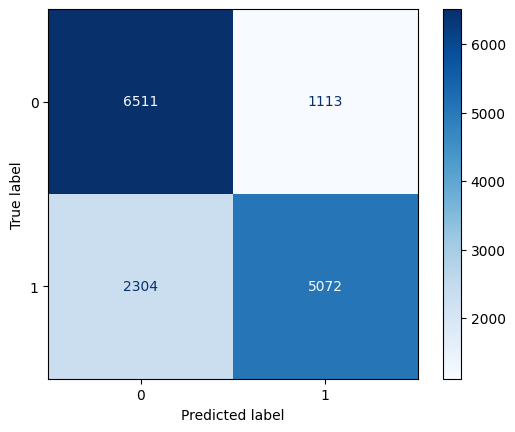

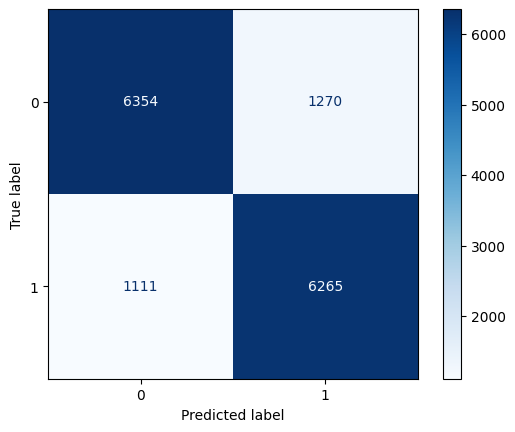

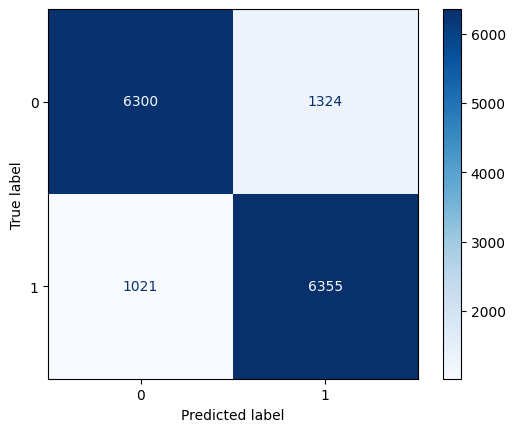

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# **Función para generar y visualizar la matriz de confusión**

def generar_y_visualizar_matriz_confusion(y_test, y_pred, nombre_clasificador):
  """
  Función genera y visualiza la matriz de confusión para un modelo Naive Bayes clasificado.
   """

  # Generar la matriz de confusión
  cm = confusion_matrix(y_test, y_pred)

  # Imprimir la matriz de confusión
  print(f"\n**Matriz de confusión del clasificador {nombre_clasificador}:")
  print(cm)

  # Visualizar la matriz de confusión
  ConfusionMatrixDisplay(cm).plot(cmap="Blues")
  #plt.show()  # Importar librería matplotlib.pyplot si no está importada

# **Ejecución de la función para generar y visualizar la matriz de confusión**

generar_y_visualizar_matriz_confusion(y_test, y_testCla[0], "GaussianNB")
generar_y_visualizar_matriz_confusion(y_test, y_testCla[1], "MultinomialNB")
generar_y_visualizar_matriz_confusion(y_test, y_testCla[2], "BernoulliNB")

# También se puede llamar la función para otros clasificadores entrenados (y_pred2, y_pred3)

